In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import pickle
import time
import json
import matplotlib.pyplot as plt

import os

sys.path.append(os.path.realpath('./lstm/'))
import data_tools
import lstm

sys.path.append(os.path.realpath('./cfe/'))
import cfe

In [2]:
cfe58 = cfe.CFE('./cfe/cat_58_config_cfe2.json')

In [3]:
lstm58 = lstm.bmi_LSTM()
lstm58.read_cfg_file('./lstm/lstm-info-cat58.cfg')

In [4]:
lstm58.initialize()
cfe58.initialize()

In [9]:
lstm58.atosphere_water__time_integral_of_precipitation_mass_flux = 0.1
cfe58.timestep_rainfall_input_m = 0.01

In [10]:
lstm58.update()
cfe58.update()

updating for t:  1773
start_this_seq 1772
for time: 1774 lstm output: 20.112555098483824


In [11]:
cfe58.total_discharge

0.6609912397249501

In [18]:
cfe_out = []
lstm_out = []
for precip in [0.1,0.2,.03,.05,0.3,.05]:
    lstm58.atosphere_water__time_integral_of_precipitation_mass_flux = precip * 1000
    cfe58.timestep_rainfall_input_m = precip
    lstm58.update()
    cfe58.update()
    cfe_out.append(cfe58.total_discharge)
    lstm_out.append(lstm58.streamflow)

updating for t:  1786
start_this_seq 1785
for time: 1787 lstm output: 8.139111173309121
updating for t:  1787
start_this_seq 1786
for time: 1788 lstm output: 8.249624701507917
updating for t:  1788
start_this_seq 1787
for time: 1789 lstm output: 9.7116053337834
updating for t:  1789
start_this_seq 1788
for time: 1790 lstm output: 8.805893954798673
updating for t:  1790
start_this_seq 1789
for time: 1791 lstm output: 9.067013846668813
updating for t:  1791
start_this_seq 1790
for time: 1792 lstm output: 9.093198985890291


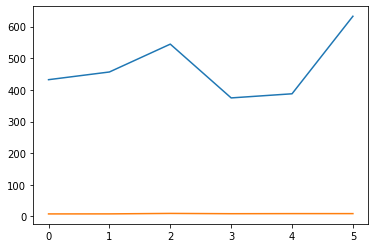

In [19]:
plt.plot(cfe_out, label="cfe")
plt.plot(lstm_out, label="lstm")